In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud  # 사이킷런 데이타셋

In [4]:
linnerud = load_linnerud()

In [5]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [6]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names), 
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [7]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [8]:
df.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

In [9]:
df.shape

(20, 6)

In [10]:
df['Chins'] = linnerud.target

In [11]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,191.0,162.0,60.0,191.0,36.0,50.0
1,189.0,110.0,60.0,189.0,37.0,52.0
2,193.0,101.0,101.0,193.0,38.0,58.0
3,162.0,105.0,37.0,162.0,35.0,62.0
4,189.0,155.0,58.0,189.0,35.0,46.0


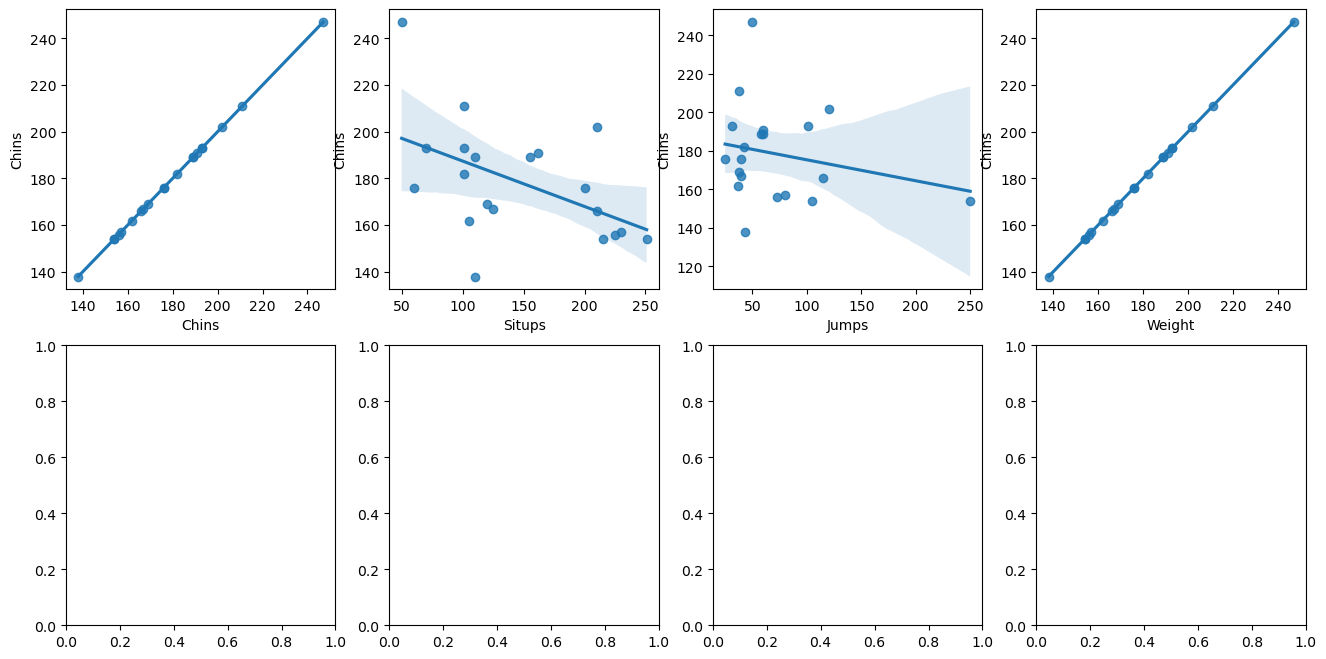

In [12]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps','Weight']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Chins', data=df, ax=axs[row][col])

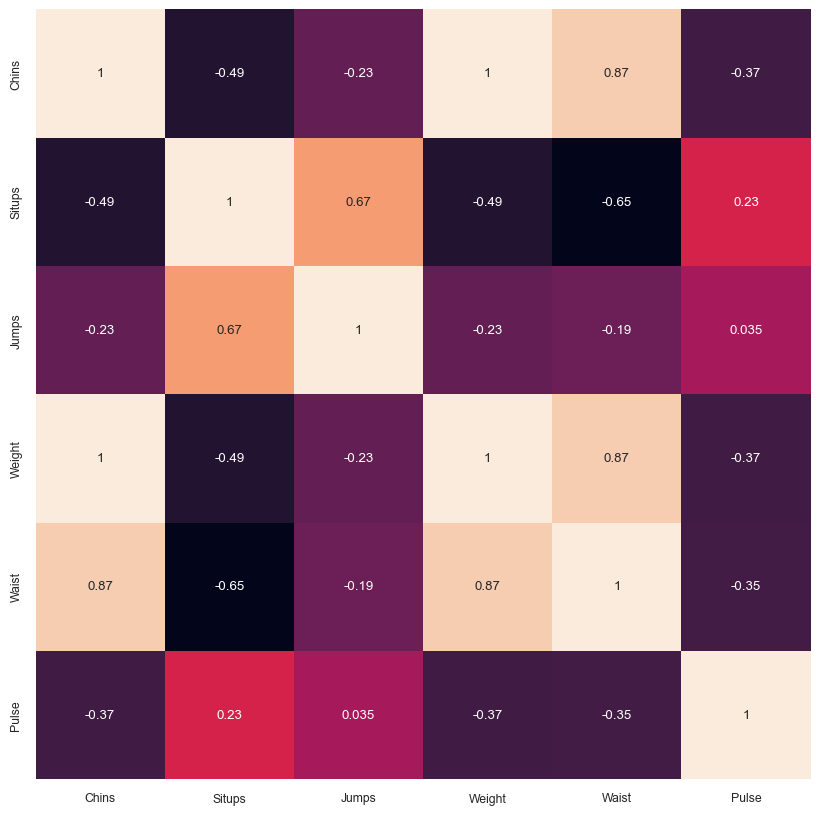

In [13]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [14]:
df.drop(columns=['Waist', 'Pulse'], inplace = True)

In [15]:
df.head()

,Chins,Situps,Jumps,Weight
0,191.0,162.0,60.0,191.0
1,189.0,110.0,60.0,189.0
2,193.0,101.0,101.0,193.0
3,162.0,105.0,37.0,162.0
4,189.0,155.0,58.0,189.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Situps', 'Jumps']]
y_data=df.loc[:, 'Chins']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 2) (16,)
(4, 2) (4,)


In [18]:
X_train.head()

,Situps,Jumps
14,70.0,31.0
16,60.0,25.0
10,120.0,38.0
8,200.0,40.0
5,101.0,42.0


LR

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-0.2  0.2]
상수항(절편): 197.2


In [22]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 2) (4, 2)


In [23]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1548.078, RMSE: 39.346
Variance score : 0.122


In [24]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 197.16580389661155
회귀계수: [-0.2  0.2]


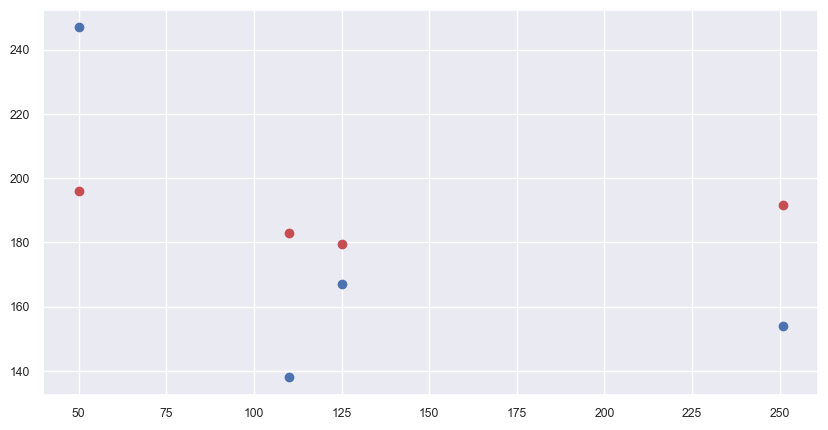

In [43]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

DT

In [34]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 34.935655139126844


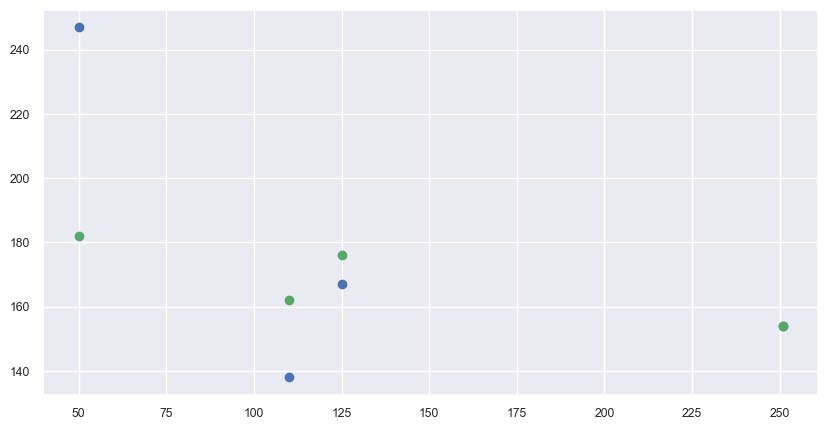

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [ ]:
SVM

In [39]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 39.3456192776492


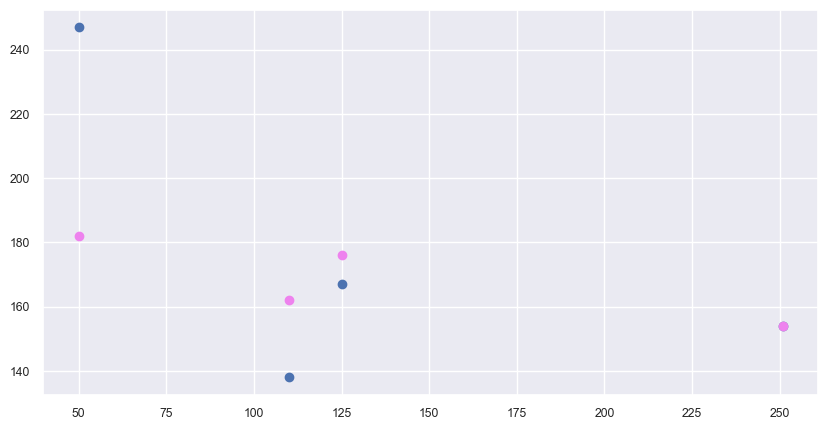

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], sy_preds, c='violet', label='sy_preds')

plt.show()    

RF

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 39.3456192776492


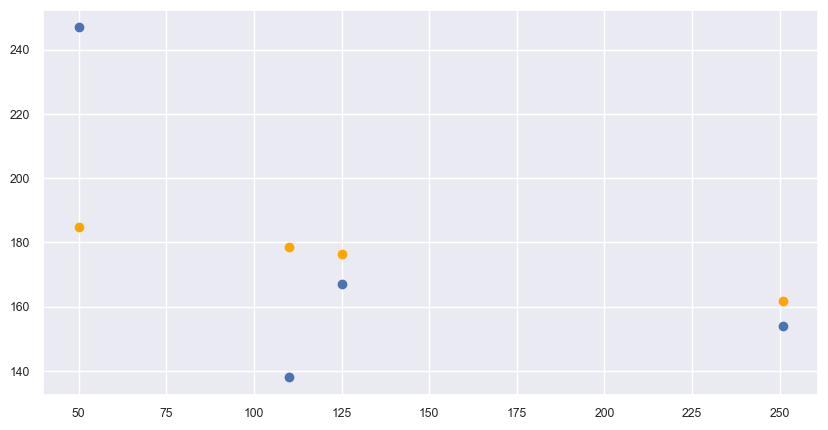

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], ry_preds, c='orange', label='ry_preds')

plt.show()   

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

Ridge

In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.26354703393696255


In [51]:
print(ridge.score(test_scaled, y_test))

0.14194618286223293


In [52]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [56]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

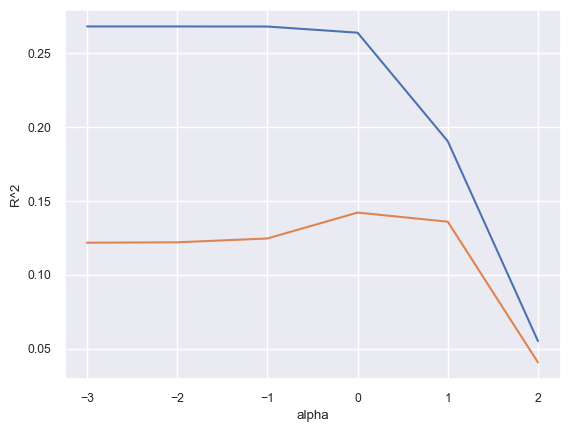

In [57]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)

print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.26770849595571933
0.12443181160533623


Lasso

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.2465595829695738


In [61]:
print(lasso.score(test_scaled, y_test))

0.17397142831272638


In [62]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

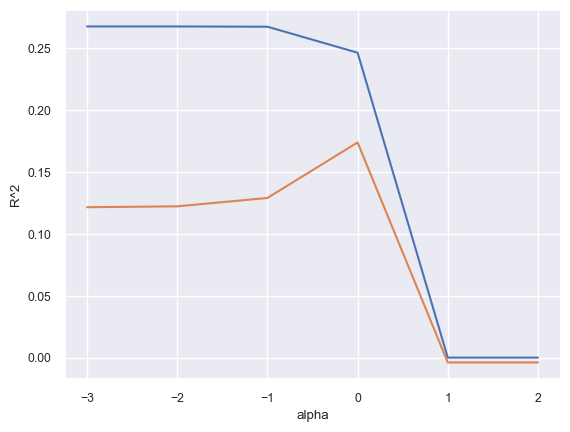

In [63]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [65]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.00391012909632571


In [66]:
print(np.sum(lasso.coef_ == 0))

2
